# Project 2 ECE 236A

**Samuel Gessow** (sgessow@gmail.com), **Steven Zhiying Li** (zhiyingli@g.ucla.edu), **Sunay Bhat** (sunaybhat1@ucla.edu), **Terri Tsai** (terri0716@gmail.com), **Dominic Yang** (domyang@g.ucla.edu)

In [1]:
import pandas as pd
import numpy as np
import cvxpy as cp

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
import MyDecoder as decoder

# for automatically reloading the imported modules
%load_ext autoreload
%autoreload 2

## SSS

In [3]:
X = np.array([[1,1,1,1,0,0,0,0],
              [0,0,0,0,1,1,1,1],
              [1,1,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0],
              [0,0,1,0,1,1,0,1],
              [0,0,0,0,1,0,0,0]])

y = np.array([1,1,0,1,1,1])

ppl_pred  = decoder.lp(X,y)
ppl_pred

array([ 0.,  0.,  1.,  0.,  1.,  0., -0.,  0.])

In [4]:
def run_lp_trials(p, n, T_list, num_trial):
    Hamming_err_lists = []
    FN_lists = []
    FP_lists = []

    for i in range(num_trial):
        Hamming_err_list = []
        FN_list = []
        FP_list = []

        for T in T_list:
            X, ppl, y = decoder.generator(n, p, T)
            ppl_pred  = decoder.lp(X,y)

            Hamming_err = sum(ppl_pred != ppl)/n
            Hamming_err_list.append(Hamming_err)

            positive_mask = (ppl == 1)
            FN = sum(ppl_pred[positive_mask] == 0) / sum(positive_mask)
            FN_list.append(FN)

            negative_mask = (ppl == 0)
            FP = sum(ppl_pred[negative_mask] == 1) / sum(positive_mask)
            FP_list.append(FP)

        Hamming_err_lists.append(Hamming_err_list)
        FN_lists.append(FN_list)
        FP_lists.append(FP_list)
    
    return Hamming_err_lists, FN_lists, FP_lists

In [5]:
def make_plot(n,p, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial):
    AVG_Hamming_err_list = np.average(Hamming_err_lists,axis=0)
    AVG_FN_list = np.average(FN_lists,axis=0)
    AVG_FP_list = np.average(FP_lists,axis=0)

    plt.subplot(1,3,1)
    for i in range(num_trial):
        #plt.plot(T_list, Hamming_err_lists[i], label = "Hamming Err", color='blue', alpha=0.3)
        plt.plot(T_list, Hamming_err_lists[i],'o', color='blue', alpha=0.3);   
    plt.plot(T_list, AVG_Hamming_err_list, label = "Averaged Hamming Err", linewidth = 3, color='blue')
    plt.plot(T_list, AVG_Hamming_err_list,'o', color='blue');
    plt.xlabel("T (number of tests)")
    plt.ylabel("Hamming Error Rate")
    plt.title("T (number of tests) vs Hamming, p = "+str(p)+", n = "+str(n))
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(1,3,2)
    for i in range(num_trial):
        plt.plot(T_list, FN_lists[i],'o', color='blue', alpha=0.3);   
    plt.plot(T_list, AVG_FN_list, label = "Averaged False Negative", linewidth = 3, color='blue')
    plt.plot(T_list, AVG_FN_list,'o', color='blue');
    plt.xlabel("T (number of tests)")
    plt.ylabel("False Negative")
    plt.title("T (number of tests) vs False Negative, p = "+str(p)+", n = "+str(n))
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(1,3,3)
    for i in range(num_trial):
        plt.plot(T_list, FP_lists[i],'o', color='blue', alpha=0.3);   
    plt.plot(T_list, AVG_FP_list, label = "Averaged False Positive", linewidth = 3, color='blue')
    plt.plot(T_list, AVG_FP_list,'o', color='blue');
    plt.xlabel("T (number of tests)")
    plt.title("T (number of tests) vs False Positive p = "+str(p)+", n = "+str(n))
    plt.ylabel("False Positive")
    plt.grid(True)
    plt.legend(loc='upper right')

    fig.set_size_inches(18, 4)

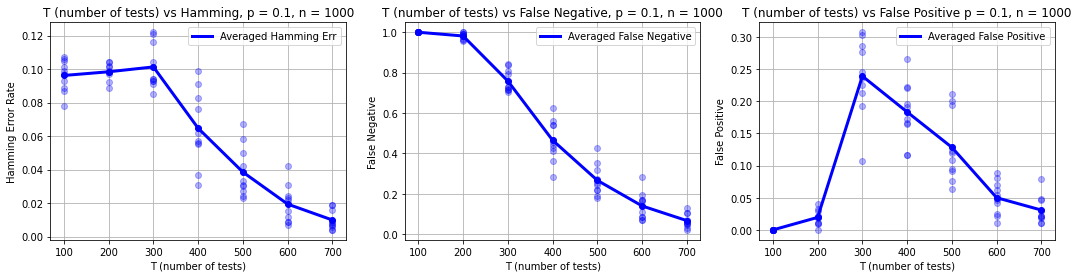

In [6]:
p = 0.1
n = 1000
T_list = range(100, 800, 100)
num_trial = 10;

Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(p, n, T_list, num_trial)

fig = plt.figure(1)
make_plot(n,p, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial)
plt.show()

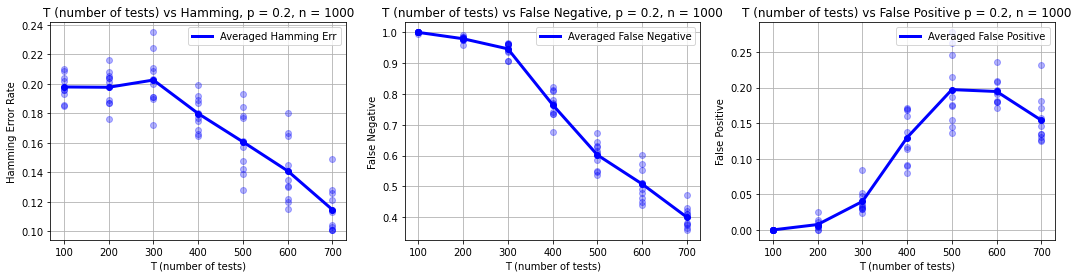

In [7]:
p = 0.2
n = 1000
T_list = range(100, 800, 100)
num_trial = 10;

Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(p, n, T_list, num_trial)

fig = plt.figure(2)
make_plot(n,p, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial)
plt.show()